# Self attention on words embeddings

In [44]:
import pickle
import numpy as np
import torch
import string
from scipy import spatial
import matplotlib.pylab as plt

In [45]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  

In [46]:
with open('data_300.pickle', 'rb') as fp:
    embeddings_dict = pickle.load(fp)

In [47]:
def closest(word_embedding,n):
    sorted_array = sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], word_embedding))[1:n+1]
    return [[word, '{:.3f}'.format(spatial.distance.euclidean(embeddings_dict[word], word_embedding))] for word in sorted_array]

In [48]:
word = "tie"

theme1 = "wedding"
theme2 = "soccer"

word_emb = embeddings_dict[word]
theme_emb1 = embeddings_dict[theme1]
theme_emb2 = embeddings_dict[theme2]

distance1 = spatial.distance.cosine(word_emb,theme_emb1)
distance2 = spatial.distance.cosine(word_emb,theme_emb2)

print("Distance {}-{} before context : {}".format(word,theme1,distance1))
print("Distance {}-{} before context : {}".format(word,theme2,distance2))

Distance tie-wedding before context : 0.8111767768859863
Distance tie-soccer before context : 0.7726714313030243


In [50]:
context = "Normally a bow tie is used when dressing in a tuxedo, which is the representation of the distinction when dressing formal. Also it is constantly related to take it in great occasions, like ceremonies or very elegant parties"

In [51]:
context = context.translate(str.maketrans('', '', string.punctuation)).lower().split(" ")

In [52]:
context = [ word for word in context if word in embeddings_dict.keys() ]

In [53]:
context = [ word for word in context if word not in stop_words]

In [54]:
print( " ".join(context))

normally bow tie used dressing tuxedo representation distinction dressing formal also constantly related take great occasions like ceremonies elegant parties


In [55]:
embeddings = [embeddings_dict[word] for word in context]

In [56]:
coefficients = []
for emb in embeddings :
    coefficients .append(np.dot(emb,word_emb))

In [57]:
coefficients = coefficients / np.sum(coefficients)

In [58]:
new_embedding = np.dot(coefficients.T,embeddings)

In [59]:
distance1 = spatial.distance.cosine(new_embedding,theme_emb1)
distance2 = spatial.distance.cosine(new_embedding,theme_emb2)

print("Distance {}-{} after context : {}".format(word,theme1,distance1))
print("Distance {}-{} after context : {}".format(word,theme2,distance2))

Distance tie-wedding after context : 0.5920571386814117
Distance tie-soccer after context : 0.7271720767021179


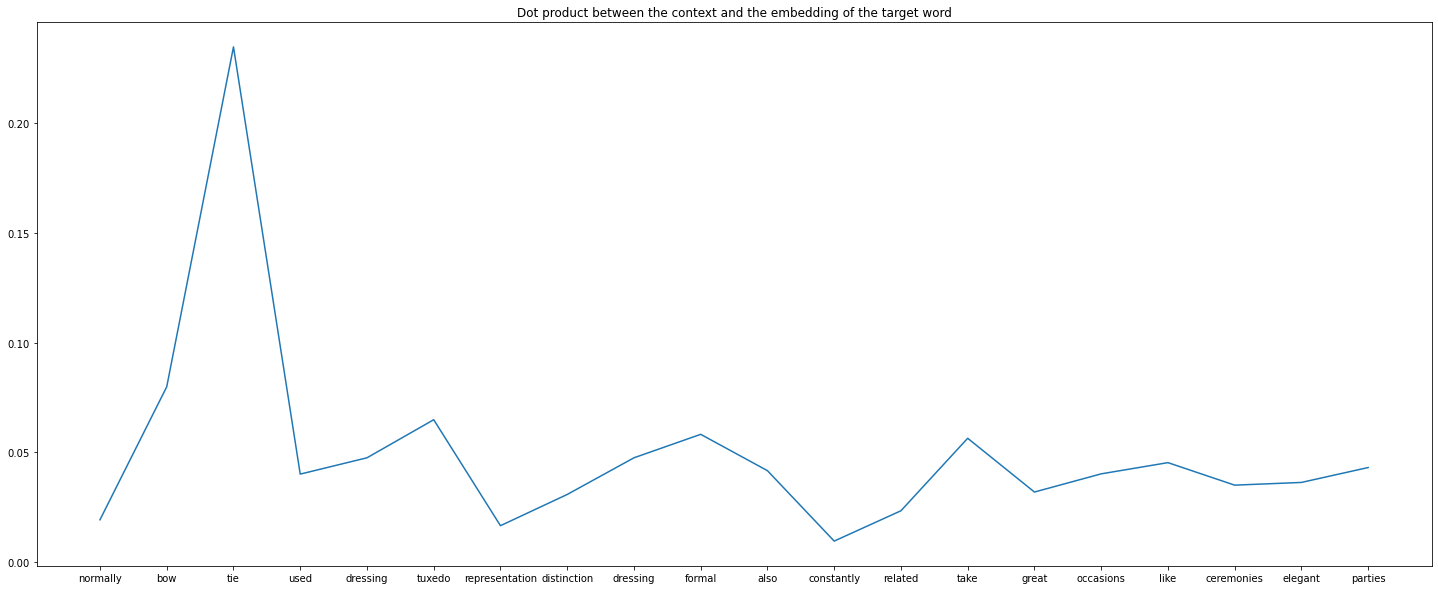

In [61]:
plt.figure(figsize=(25,10))
x = np.arange(len(context))
plt.xticks(x, context)
plt.plot(x,list(coefficients))
plt.title("Dot product between the context and the embedding of the target word")
plt.show()